# Exercise 6: Logistic regression and classification

You will be pleased to find that the framework for logistic regression is very similar to that of the linear regression. For this exercise we use the `GLM` method in the statsmodels library (https://www.statsmodels.org/stable/glm.html), in which we specify the model via the model matrix `X`. There is also an equivalent method, `glm`, that allows specification via the formula API just as for linear regression. The sklearn library has also a `LogisticRegression` method, but note that it by default regularizes the estimated coefficients using an L2-penalty. To run a classical logistic regression with parameters estimated by maximum likelihood, you will need to set `penalty = 'none'`.

In [10]:
# Import relevant packages
import numpy as np
import pandas as pd
import math
from math import log, sqrt
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf 

from sklearn.linear_model import LogisticRegression

## Getting familiar with the model

### Translation between log-odds and probabilities


Implement the standard logistic function `sigma` as well as its inverse, the logit function. Make a plot of `sigma`

Explain how these two functions are used to transform a probability into log-odds and vice versa.

In [5]:
sigma = lambda eta : (math.e**eta) / (1 + math.e**eta)

In [19]:
logit = lambda p : log((p)/(1-p))

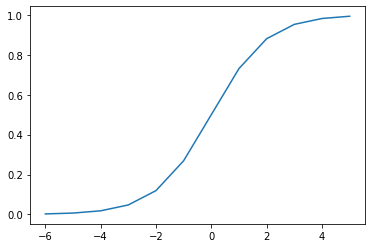

In [15]:
plt.plot(range(-6,6),[sigma(i) for i in range(-6,6)]);

In [ ]:
# Log-odds of probability function gives us eta in the end
# p(X) = sigma(X) -> odds = p(X)/(1-p(X)) = e^eta -> log-odds = eta

Consider a logistic regression model with a single feature $X$ where $\beta_0=0.3$ and $\beta_1=0.7$. 

A) What is the probability of Y=1 when X=5?

B) What are the odds of Y=1 for X=5?

C) What is the *odds ratio* comparing odds of Y=1 when X=8 to the odds when X=5?

In [26]:
b0 = 0.3
b1 = 0.7
prob = sigma(b0 + b1*5)
print(f'probability of Y=1 when X=5 is: {prob}')

probability of Y=1 when X=5 is: 0.9781187290638695


In [27]:
odds = logit(prob)
print(f'Odds of Y=1 when X=5 is: {odds}')

Odds of Y=1 when X=5 is: 3.8000000000000007


In [31]:
odds2 = logit(sigma(b0+b1*8))
print(f'Odds Ration of X=8 compared to X=5: {odds2/odds}')
print('I.e. X=8 is 1.5 times more likely to have Y=1 compared to X=5')

Odds Ration of X=8 compared to X=5: 1.5526315789473666
I.e. X=8 is 1.5 times more likely to have Y=1 compared to X=5


## Load data

Load the `Default` data set from the ISLwR book, which is a simulated data set containing information on ten thousand customers. We will recreate the results in section 4.3. The aim with the data is to predict which customers will default on their credit card debt.

`default`: A binary variable with levels No and Yes indicating whether the customer defaulted on their debt.

`student` A factor with levels No and Yes indicating whether the customer is a student

`balance` The average balance that the customer has remaining on their credit card after making their monthly payment

`income` Income of customer

In [3]:
data = pd.read_csv('Default.csv')
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


Split data into a training set and a test set

In [4]:
# Random Permutation of indices and split into train/test on 70/30 split
shuffle = list(np.random.permutation(data.shape[0]))
train_idx = shuffle[:int(len(shuffle)*0.7)]
test_idx = shuffle[int(len(shuffle)*0.7):]
# Slicing the data!
train_data = data.iloc[train_idx]
test_data = data.iloc[test_idx]

## Fitting the logistic regression

A logistic regression model is specified as

`sm.GLM(y, X, family=sm.families.Binomial(link = sm.families.links.logit()))`

Here we have specified
1. the outcome variable Y
2. the model matrix X, which specifies how features enter the model
3. the *family* of distributions for Y, which is the *binomial distribution*
4. the *link function*, which is the *logit* for performing logistic regression. This link function is the default for the binomial, so we can leave it out.

As for linear regression, the model is fitted with the `fit` method. From the resulting object you can obtain parameters and the fitted values on the training data. You predict with `predict` method and you can see the output via `summary` method.

Fit a logistic regression model, `M1`, that has `balance` as the only feature, and check your results against Table 4.1 in ISLwR.

In [7]:
model = sm.GLM(np.asarray(train_data['default']), np.asarray(train_data[['balance']]), 
    family=sm.families.Binomial(link = sm.families.links.logit()))

In [9]:
model.fit()

TypeError: can only concatenate str (not "float") to str

Fit the exact same model, but using `LogisticRegression` from sklearn, taking care that you turn off regularization.

In [12]:
model_sklearn = LogisticRegression(penalty='none').fit(train_data['balance'], train_data['default'])


ValueError: Expected 2D array, got 1D array instead:
array=[1189.15893364 1035.552944    592.04518161 ... 1772.85548375  426.6935421
  967.44157378].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Fit another model, `M2`, that takes a single *categorical* feature, `student`, and check the results against Table 4.2

Fit a model, `M3`, that has an interaction between `student` and `balance`.

For each of the three models, write down the formula for the estimated probabilities using the estimated coefficients. Write down also the formula for the estimated log odds.

## Prediction 

Fitted values --the mean response-- are obtained as for the linear regression. However a main difference is that the mean is not used directly as a prediction of Y. Rather, we choose a threshold $\alpha$ and predict $Y=1$ whenever $P(Y=1|X) > \alpha$. Usually we take $\alpha = 0.5$, unless we specifically wish to incur a "higher cost" for some kinds of misclassifications.

Using $\alpha = 0.5$, compute the training error rate (proportion of wrong classifications) for models M1, M2, and M3.

Compute the test error for the three models and compare to the training error.

Compare the three models by their AIC: Based on this criterion, which would you choose?

### Decision regions and the decision boundary between them

In model M1, describe the *decision regions*, i.e. for which values of the feature (income) you would predict that an individual defaults, and for which you would predict not default. 

Fit a model, `M4`, with two continuous features `income` and `balance`.

Make a plot of your feature space (i.e. with income and balance on the axes) as follows: 
Use the model to predict the class for each point in a fine grid over the two features. Plot the points of the grid and colour them according to class: Blue for default = Yes, Red for default = No.

Add a quadratic term to the model and make the same plot as before. You should now obtain a non-linear decision boundary (although if you plotted against the squared feature, you would indeed get a linear boundary!)

## Interpreting a model

A) For model M1, predict the probability of defaulting for an individual with a balance of 1,000 and for an individual with balance 2,000. Try to compute the prediction from scratch yourself as well as with the `predict` method. You should obtain the same as in section 4.3.3.

B) Considering the same two individuals, how many times higher are the odds of defaulting for the individual with low balance?

C) For model M2, what are the probabilities of defaulting for students and non-students respectively? You should obtain the same as in section 4.3.3.

D) In M1, what is the interpretation of the coefficient for `balance`?

E) (optional) In model M3, compute the odds-ratio comparing the odds of defaulting for a student with high balance (2,000) and a student with a low balance (1,000). Do the same for a non-student. Note that the odds ratio differs -- this is a consequence of the *interaction* term!